In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
from datetime import datetime, date
import json
from xgrads import open_CtlDataset
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import folium 
%matplotlib inline

In [2]:
# Choose a domain
domain = 'BEAU'

# Path to the SnowModel folder
SMpath = '/nfs/attic/dfh/2020_NPRB/domain_'+domain+'/test/'
# stream gage data 
gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'
#ET data
etpath = '/nfs/attic/dfh/2020_NPRB/data/modis_ET/'+domain+'/'
#datapath
datapath = '/nfs/attic/dfh/2020_NPRB/data/SMinputs/'+domain+'/'

#path to NPRB domains
domains_resp = requests.get("https://raw.githubusercontent.com/NPRB/02_preprocess_python/main/NPRB_domains.json")
domains = domains_resp.json()

In [3]:
#load ET data
modis = xr.open_dataset(etpath+'modis_annualET_m.nc')
modis

<xarray.Dataset>
Dimensions:  (wy: 18, y: 496, x: 1298)
Coordinates:
  * wy       (wy) int64 2002 2003 2004 2005 2006 ... 2015 2016 2017 2018 2019
  * y        (y) float64 2.456e+06 2.454e+06 2.454e+06 ... 1.962e+06 1.96e+06
  * x        (x) float64 -5.425e+05 -5.415e+05 ... 7.535e+05 7.545e+05
Data variables:
    modisET  (wy, y, x) float64 ...

In [4]:
# load station discharge data
path=gagepath+domain+'_discharge_cfs.csv'
Q = pd.read_csv(path,parse_dates=['datetimeUTC'],infer_datetime_format=True,index_col='datetimeUTC')
Q

,USGS:15798700:00060:00003,USGS:15803000:00060:00003,USGS:15820000:00060:00003,USGS:15860000:00060:00003,USGS:15861000:00060:00003,USGS:15862500:00060:00003,USGS:15875000:00060:00003,USGS:15896000:00060:00003,USGS:15904800:00060:00003,USGS:15905100:00060:00003,USGS:15906000:00060:00003,USGS:15908000:00060:00003,USGS:15955000:00060:00003,USGS:15960000:00060:00003,USGS:15980000:00060:00003
datetimeUTC,,,,,,,,,,,,,,,
1988-10-01 00:00:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,190.0,NaN,NaN,NaN,680.0,NaN,NaN,NaN
1988-10-02 00:00:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,640.0,NaN,NaN,NaN
1988-10-03 00:00:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,600.0,NaN,NaN,NaN
1988-10-04 00:00:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,580.0,NaN,NaN,NaN
1988-10-05 00:00:00+00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,160.0,NaN,NaN,NaN,540.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,NaN,2240.0,NaN,NaN,NaN,NaN,21700.0,2720.0,NaN,NaN,NaN,1450.0,NaN,NaN,209.0
2020-09-27 00:00:00+00:00,NaN,1730.0,NaN,NaN,NaN,NaN,19800.0,2330.0,NaN,NaN,NaN,1320.0,NaN,NaN,199.0
2020-09-28 00:00:00+00:00,NaN,1360.0,NaN,NaN,NaN,NaN,18400.0,1990.0,NaN,NaN,NaN,1260.0,NaN,NaN,192.0


In [5]:
# load station metadata
path=gagepath+domain+'_gage_meta_proj.geojson'
meta=gpd.read_file(path)
meta

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,15798700,NUNAVAK C NR BARROW AK,ST,711535.00,1564657.00,71.259303,-156.785972,M,U,...,None,NNNNNNNN,None,None,None,None,None,None,None,POINT (-102394.432 2364619.819)
1,USGS,15803000,MEADE R AT ATKASUK AK,ST,702945.00,1572333.00,70.495376,-157.395848,M,S,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (-129053.158 2282397.475)
2,USGS,15820000,IKPIKPUK R BL FRY C NR ALAKTAK AK,ST,694600.50,1543940.60,69.766390,-154.664406,N,1,...,None,Y,None,None,None,None,None,None,None,POINT (-26059.586 2199320.070)
3,USGS,15860000,FISH C NR NUIQSUT AK,ST,701614.00,1515209.00,70.270199,-151.872308,N,S,...,None,Y,None,None,None,None,None,None,None,POINT (81670.125 2255756.841)
4,USGS,15861000,JUDY C NR NUIQSUT AK,ST,701314.00,1515005.00,70.220199,-151.837848,N,S,...,None,Y,None,None,None,None,None,None,None,POINT (83170.671 2250324.988)
5,USGS,15862500,UBLUTUOCH R 13.7 MI AB MOUTH NR NUIQSUT AK,ST,701433.56,1511741.81,70.242656,-151.294947,G,F,...,None,Y,None,None,None,None,None,None,None,POINT (103943.670 2253548.499)
6,USGS,15875000,COLVILLE R AT UMIAT AK,ST,692137.80,1520721.70,69.360500,-152.122694,Y,D,...,None,NYNNNNNN,None,None,None,None,None,None,None,POINT (74884.972 2155626.519)
7,USGS,15896000,KUPARUK R NR DEADHORSE AK,ST,701654.00,1485735.00,70.281385,-148.962786,M,T,...,None,NNNNNNNN,None,None,None,None,None,None,None,POINT (193105.171 2263000.626)
8,USGS,15904800,ATIGUN R NR PUMP STATION 4 AK,ST,681254.00,1492413.00,68.214613,-149.406411,M,F,...,None,NNNNNNNN,None,None,None,None,None,None,None,POINT (191851.249 2034798.385)
9,USGS,15905100,ATIGUN R BL GALBRAITH LK NR PUMP STATION 4 AK,ST,682708.00,1492224.00,68.452222,-149.373333,Y,S,...,None,None,None,None,None,None,None,None,None,POINT (191402.544 2061090.423)


In [6]:
# load upslope watershed area masks
upslope = xr.open_dataset(gagepath+'upslope.nc')
upslope

<xarray.Dataset>
Dimensions:      (y: 496, x: 1298)
Coordinates:
    band         int64 ...
  * y            (y) float64 2.456e+06 2.454e+06 ... 1.962e+06 1.96e+06
  * x            (x) float64 -5.425e+05 -5.415e+05 ... 7.535e+05 7.545e+05
    spatial_ref  int64 ...
Data variables: (12/15)
    15798700     (y, x) float32 ...
    15803000     (y, x) float32 ...
    15820000     (y, x) float32 ...
    15860000     (y, x) float32 ...
    15861000     (y, x) float32 ...
    15862500     (y, x) float32 ...
    ...           ...
    15905100     (y, x) float32 ...
    15906000     (y, x) float32 ...
    15908000     (y, x) float32 ...
    15955000     (y, x) float32 ...
    15960000     (y, x) float32 ...
    15980000     (y, x) float32 ...

### calculate weighted precip correction factor

In [66]:
start_years_list = list(range(2001,2018))
end_years_list = list(range(2003,2020))

specPs = np.empty([len(start_years_list),len(stn_list)])
specQs = np.empty([len(start_years_list),len(stn_list)])
specETs = np.empty([len(start_years_list),len(stn_list)])
Pcfs = np.empty([len(start_years_list),len(stn_list)])
numpixs = []


    
for g in range(len(stn_list)):
    gage = stn_list[g]
    print(gage)
    # et data 
    modis['mask'] = upslope[gage]
    #calculate number of pixels in upslope
    numpix = int(modis.mask.where(modis.mask==100).count())
    numpixs.append(numpix)
    # calculate upslpe area
    wshedA=int(modis.mask.where(modis.mask==100).count())*1000*1000
    for y in range(len(start_years_list)):
        styr = start_years_list[y]
        edyr = end_years_list[y]
        print(edyr)

        # station name
        stn = stn = 'USGS:'+gage+':00060:00003'
        # stn Q
        stnQ = Q[stn][str(styr+1)+'-09-01' :str(edyr)+'-08-31']
        # convert stn units of cfs to m^3/d
        stnq = stnQ*60*60*24/35.3147
        # prec data
        ctlFile = SMpath+'outputs/wo_assim_'+str(styr)+'-'+str(edyr)+'/prec.ctl'
        p = open_CtlDataset(ctlFile)
        #add upslope mask
        p['mask']=(['lat', 'lon'],  np.flipud(upslope[gage].values))
        # specific precipitation
        specP=np.nansum(p.prec.sum(dim='time').where(p.mask==100).values)/numpix
        specPs[y,g]=specP
        # specific discharge 
        specQ=stnq.sum()/wshedA
        specQs[y,g]=specQ
        # specific ET
        specET = np.nansum(modis.modisET.sel(wy = edyr).where(modis.mask==100).values)/numpix
        specETs[y,g]=specET
        # correction factor 
        Pcfs[y,g]=specP/(specQ+specET)

15798700
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
15803000
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
15820000
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
15860000
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
15861000
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
15862500
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
15875000
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
15896000
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
15904800
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
15905100
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
15906000
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2

In [67]:
# dataframe of stations with correction factors for each year
df = pd.DataFrame(Pcfs,columns = stn_list)
df

,15798700,15803000,15820000,15860000,15861000,15862500,15875000,15896000,15904800,15905100,15906000,15908000,15955000,15960000,15980000
0,3.472428,5.291306,5.258444,4.208532,4.271357,3.688578,2.307017,2.769287,2.778736,9.985020,2.193239,2.099487,6.270842,5.396339,8.888432
1,1.784520,4.630050,4.498382,3.978583,3.924539,3.499007,2.467081,2.460695,3.310731,7.018482,2.935018,2.058995,4.928383,4.454436,7.113885
2,4.751615,5.085449,2.535774,2.549932,2.681217,3.527741,2.188966,2.331842,2.787920,5.191214,2.841106,2.184833,3.784322,3.686162,6.080224
3,4.820465,2.562370,2.797871,2.328526,2.580090,3.455060,2.041937,2.407151,2.904532,7.172879,2.417158,2.021615,3.982587,3.233759,6.604993
4,3.051156,2.413778,2.528049,1.937684,2.060890,1.778097,2.146273,2.117329,2.589591,4.993474,2.647230,2.026586,3.197878,2.763440,5.426434
5,3.443901,2.358733,2.228981,2.210312,2.262980,2.000167,2.232465,2.306882,2.952804,5.746159,3.711348,2.166156,2.069094,1.751769,6.598775
6,5.200285,2.784622,2.377964,2.076903,2.436223,1.765133,2.243695,2.277530,3.373428,7.610631,5.298451,2.089578,1.832089,1.926526,7.026964
7,5.359298,3.072364,3.679173,3.430426,3.311928,2.885782,2.183424,2.173438,5.204837,5.372368,4.568639,1.730976,1.853779,1.813448,6.056402
8,4.961956,2.562884,3.766671,3.369752,3.289680,2.865454,1.931717,2.079543,4.862137,2.044087,3.655812,1.784176,1.646835,1.476154,2.840397
9,4.177395,2.963887,4.584379,3.924778,3.742229,3.422714,2.099847,2.522729,7.112125,1.857099,4.347501,1.782772,1.885887,1.853939,2.710009


In [92]:
# data frame with mean cfs and weight
newdf = pd.DataFrame(list(zip(stn_list,df.median().values,(numpixs/np.sum(numpixs)).tolist())),columns=['stn','cf','wt'])
newdf

,stn,cf,wt
0,15798700,4.961956,0.000101
1,15803000,2.815484,0.071948
2,15820000,4.498382,0.063929
3,15860000,3.978583,0.022260
4,15861000,3.924539,0.020364
5,15862500,3.527741,0.005558
6,15875000,2.099847,0.516283
7,15896000,2.306882,0.122590
8,15904800,4.863609,0.001824
9,15905100,2.044087,0.008930


In [93]:
newdf.to_csv(datapath + domain+'_precCF.csv')

In [85]:
# calculate weighted correction factor
sum(newdf.cf*newdf.wt)

2.6065241074778958

### calc cf for largest watershed

In [7]:
#find station with the largest upslope area
stn_list = meta.site_no.tolist()
count = []
for stn in stn_list:
    count.append(upslope[stn].where(upslope[stn]==100).count().values.tolist())
    
gage = np.array(stn_list)[count==np.max(count)][0]
gage

'15875000'

In [8]:
# et data 
modis['mask'] = upslope[gage]
modis

<xarray.Dataset>
Dimensions:      (wy: 18, y: 496, x: 1298)
Coordinates:
  * wy           (wy) int64 2002 2003 2004 2005 2006 ... 2016 2017 2018 2019
  * y            (y) float64 2.456e+06 2.454e+06 ... 1.962e+06 1.96e+06
  * x            (x) float64 -5.425e+05 -5.415e+05 ... 7.535e+05 7.545e+05
    band         int64 1
    spatial_ref  int64 0
Data variables:
    modisET      (wy, y, x) float64 ...
    mask         (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [9]:
#calculate number of pixels in upslope
numpix = int(modis.mask.where(modis.mask==100).count())
# calculate upslpe area
wshedA=int(modis.mask.where(modis.mask==100).count())*1000*1000
numpix,wshedA

(35671, 35671000000)

In [41]:
start_years_list = list(range(2001,2018))
end_years_list = list(range(2003,2020))

specPs = []
specQs = []
specETs = []
Pcfs = []

for y in range(len(start_years_list)):
    styr = start_years_list[y]
    edyr = end_years_list[y]
    print(edyr)

    # station name
    stn = stn = 'USGS:'+gage+':00060:00003'
    # stn Q
    stnQ = Q[stn][str(styr+1)+'-09-01' :str(edyr)+'-08-31']
    # convert stn units of cfs to m^3/d
    stnq = stnQ*60*60*24/35.3147
    # prec data
    ctlFile = SMpath+'outputs/wo_assim_'+str(styr)+'-'+str(edyr)+'/prec.ctl'
    p = open_CtlDataset(ctlFile)
    #add upslope mask
    p['mask']=(['lat', 'lon'],  np.flipud(upslope[gage].values))
    # specific precipitation
    specP=np.nansum(p.prec.sum(dim='time').where(p.mask==100).values)/numpix
    specPs.append(specP)
    # specific discharge 
    specQ=stnq.sum()/wshedA
    specQs.append(specQ)
    # specific ET
    specET = np.nansum(modis.modisET.sel(wy = edyr).where(modis.mask==100).values)/numpix
    specETs.append(specET)
    # correction factor 
    Pcfs.append(specP/(specQ+specET))

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


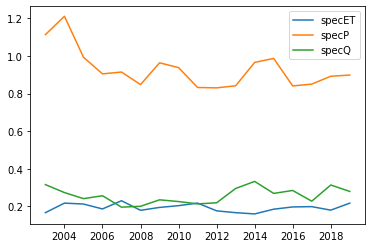

In [42]:
plt.plot(end_years_list,specETs,label ='specET')
plt.plot(end_years_list,specPs,label ='specP')
plt.plot(end_years_list,specQs,label ='specQ')
plt.legend()

In [43]:
# save correction factors 
df = pd.DataFrame(list(zip(end_years_list,Pcfs)),columns = ['wy','cf'])
df

,wy,cf
0,2003,2.307017
1,2004,2.467081
2,2005,2.188966
3,2006,2.041937
4,2007,2.146273
5,2008,2.232465
6,2009,2.243695
7,2010,2.183424
8,2011,1.931717
9,2012,2.099847


(2.0676365651532103, 2.099847203333764)

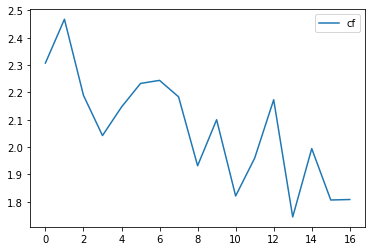

In [45]:
df.cf.plot(label = 'cf',legend=True)
df.cf.mean(),df.cf.median()